**Assignment#5_1.** Visualisasikan korelasi feature median_house_value dengan total_rooms, housing_median_age, dan households menggunakan scatter plot.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv')

if os.path.isfile(directory):
    print("File ditemukan")

File ditemukan


In [ ]:
dataset = pd.read_csv(directory)

In [ ]:
dataset_numbers = dataset.select_dtypes(include = ['float64'])

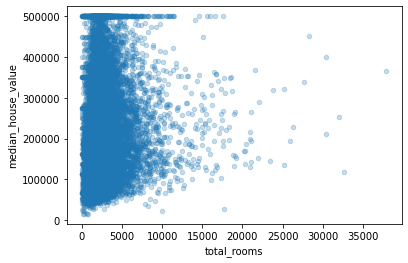

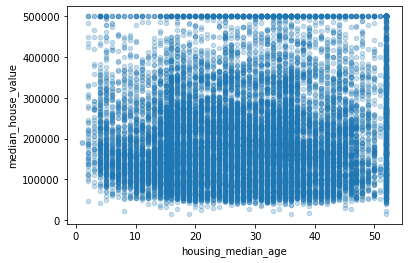

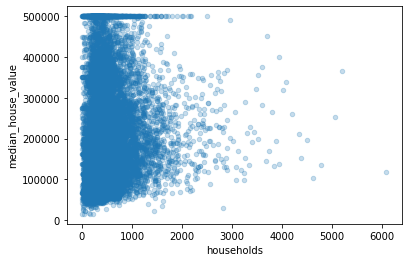

In [ ]:
dataset.plot(kind="scatter", x="total_rooms", y="median_house_value", alpha=0.25)
dataset.plot(kind="scatter", x="housing_median_age", y="median_house_value", alpha=0.25)
dataset.plot(kind="scatter", x="households", y="median_house_value", alpha=0.25)
plt.show()

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 

dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

**Assignment#5_2.** Lakukan training dengan komposisi berikut:

    90% training data & 10% testing
    85% training data & 15% testing

Lalu lakukan regression menggunakan RandomForestRegressor. Bandingkan ketika skor r2 yang didapat (90% training, 85% training, 80% training yang sudah dilakukan sebagai contoh diatas).

Tariklah kesimpulan yang didapat setelah membandingkan 3 skor tersebut.



In [ ]:
feature = dataset.drop(['median_house_value'], axis=1) 
label = dataset['median_house_value']

feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(dataset['median_house_value'].values.reshape(-1,1)).flatten()

from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2) # 80% training, 20% testing
#feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.15) # 85% training, 15% testing
#feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.1) # 90% training, 10% testing

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

cross_validation_score = cross_val_score(forest_reg, feature_train,label_train, cv=10)
forest_reg.fit(feature_train,label_train)
r2_score(forest_reg.predict(feature_train), label_train)
print(cross_validation_score)
print(forest_reg)

[0.8052713  0.84057863 0.80178834 0.82356045 0.81976299 0.79724242
 0.80421135 0.8173018  0.8176839  0.8065196 ]
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
forest_score = r2_score(forest_reg.predict(feature_test), label_test) 
forest_score

0.7598396146959498

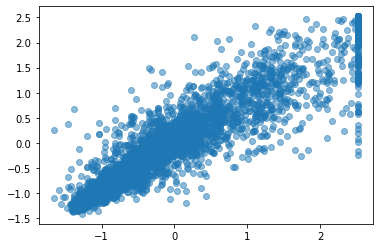

In [ ]:
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions, alpha=.5)

Skor r2 yang diperoleh dengan metode random forest regression:

*   Untuk komposisi 90% train & 10% test : 0.7933956866927651
*   Untuk komposisi 85% train & 15% test : 0.8007641515205481
*   Untuk komposisi 80% train & 20% test : 0.7598396146959498

Kesimpulan: Dalam hal ini, komposisi 85% train & 15% test adalah komposisi yang terbaik atau paling akurat ditinjau dari nilai r2 serta hasil scatter plot diagonalnya.


**Assignment#5_3.** Gunakan SVR (SVM Regression) (from sklearn.svm import SVR) untuk melakukan training. Bandingkan hasil r2 score yang didapat dengan LinearRegression. Komposisi training & testing: 80:20. Tariklah kesimpulan yang didapat.



In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

model_svr = SVR(kernel="rbf")
model_svr.fit(feature_train,label_train.ravel())

label_pred = model_svr.predict(feature_test)
from sklearn.metrics import r2_score
print("Model Score for Training data: {}".format(model_svr.score(feature_train,label_train)))
print("Model Score for Testing data: {}".format(r2_score(label_test,label_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(label_test,label_pred))))

Model Score for Training data: 0.7661128275015477
Model Score for Testing data: 0.761120685947223
Root Mean Squared Error is 0.4882372834698092


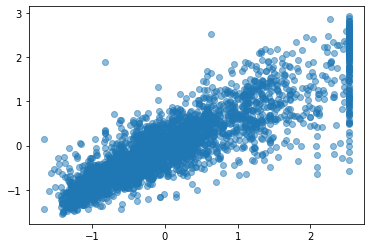

In [ ]:
predictions = model_svr.predict(feature_test)
plt.scatter(label_test, predictions, alpha=.5)

Nilai r2 score yang diperoleh dengan menggunakan SVR(SVM Regression) adalah 0.488. Nilai tersebut lebih besar (lebih baik) jika dibandingkan dengan r2 score hasil metode linear regression, dimana r2 scorenya sebesar 0.446.